In [0]:
#Importing few libaries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn 
import dateutil
from sklearn import preprocessing
import datetime

In [0]:
#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

dataset = pd.read_csv('Sexual Assault Prevention Questionaire (Responses)-1.csv',header=0,encoding = 'unicode_escape')

In [3]:
#Viewing the data
dataset.head()

,Timestamp,What is your current age?,Which of the categories best describe you?,How do you identify yourself?,"Do you own or carry any forms of protection in case of sexual assault, attack, or other potential harm?",Would you buy a product that would help protect you before sexual assault was to occur?,"Have you ever used any commercial DNA testing services (23andMe, Ancestry, etc)?",Have you ever been a victim of sexual assault or rape?,Have you ever witnessed assault or rape?,"If you answered ""Yes"" or ""Maybe"" to ""Have you ever been a victim of sexual assault or rape?"" or ""Have you ever witnessed assault or rape?"", did you or the victim file a police report or go to the hospital afterwards?","If you did not file a police report or go to the hospital, why?",How comfortable do you feel going to the authorities (police or hospitals) on a scale of 1 to 10 (where 1 = Very Uncomfortable to 10=Very Comfortable).,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,4/17/2019 13:38:41,35-45,White,Male,"No, I do not own any forms of protection.","No, I would not buy something to protect me ag...",No,No,NaN,NaN,Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/17/2019 19:17:06,18-25,Asian/Pacific Islander,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,No,No,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4/17/2019 19:54:41,18-25,Asian/Pacific Islander,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,Yes,No,"No, I nor the victim did not go to the hospit...",NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4/17/2019 16:39:58,18-25,Black,Female,"No, I do not own or carry any forms of protect...","Maybe, I would think about buying a product to...",No,No,No,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4/17/2019 19:06:39,18-25,Other,Male,"No, I do not own or carry any forms of protect...","No, I would not buy something to protect me ag...",No,No,No,"No, I nor the victim did not go to the hospit...",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset_len = len(dataset)
print("dataset_length",dataset_len)

dataset_length 1104


In [5]:
#Checking rows and columns
dataset.shape

(1104, 18)

In [6]:
#Checking data types of the coloumns
dataset.dtypes

Timestamp                                                                                                                                                                                                                    object
What is your current age?                                                                                                                                                                                                    object
Which of the categories best describe you?                                                                                                                                                                                   object
How do you identify yourself?                                                                                                                                                                                                object
Do you own or carry any forms of protection in case of sexual assault, attack, or other 

In [0]:
#This is to drop duplicate dataset in the columns
dataset = dataset.drop_duplicates()

In [8]:
#Checking relationships between variables
corr = dataset.corr()
corr

,How comfortable do you feel going to the authorities (police or hospitals) on a scale of 1 to 10 (where 1 = Very Uncomfortable to 10=Very Comfortable).,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
How comfortable do you feel going to the authorities (police or hospitals) on a scale of 1 to 10 (where 1 = Very Uncomfortable to 10=Very Comfortable).,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset.shape

(1005, 18)

In [10]:
#Identify constant features
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

constant_features_dataset = set(identify_constant_features(dataset))

print('There were {} constant features in TRAIN dataset.'.format(len(constant_features_dataset)))

There were 6 constant features in TRAIN dataset.


In [0]:
# Drop the constant features
dataset.drop(constant_features_dataset, inplace=True, axis=1)

In [12]:
dataset.shape

(1005, 12)

In [0]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [0]:
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [0]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [16]:
#Checking data types of the coloumns
dataset.dtypes

Timestamp                                                                                                                                                                                                                    object
What is your current age?                                                                                                                                                                                                    object
Which of the categories best describe you?                                                                                                                                                                                   object
How do you identify yourself?                                                                                                                                                                                                object
Do you own or carry any forms of protection in case of sexual assault, attack, or other 

In [17]:
dataset.describe()

,How comfortable do you feel going to the authorities (police or hospitals) on a scale of 1 to 10 (where 1 = Very Uncomfortable to 10=Very Comfortable).
count,1003.000000
mean,6.481555
std,2.812931
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


In [0]:
#dummies = pd.get_dummies(dataset['How do you identify yourself?'])

In [0]:
#dummies = pd.get_dummies(dataset['What is your current age?'])

In [20]:
dataset.isnull().sum()

Timestamp                                                                                                                                                                                                                     1
What is your current age?                                                                                                                                                                                                     1
Which of the categories best describe you?                                                                                                                                                                                    1
How do you identify yourself?                                                                                                                                                                                                 1
Do you own or carry any forms of protection in case of sexual assault, attack, or other potential harm? 

In [25]:
dataset = dataset.dropna(thresh = 3)

dataset.isnull().sum()

Timestamp                                                                                                                                                                                                                     0
What is your current age?                                                                                                                                                                                                     0
Which of the categories best describe you?                                                                                                                                                                                    0
How do you identify yourself?                                                                                                                                                                                                 0
Do you own or carry any forms of protection in case of sexual assault, attack, or other potential harm? 

In [37]:
dataset['What is your current age?'].value_counts()

25-35       442
18-25       239
35-45       188
45-55        81
55+          50
Under 18      4
Name: What is your current age?, dtype: int64

In [0]:
labels = dataset['What is your current age?'].value_counts().index.to_list()
sizes = dataset['What is your current age?'].value_counts().values.tolist()

In [40]:
dataset['What is your current age?'].value_counts().values.tolist()

[442, 239, 188, 81, 50, 4]

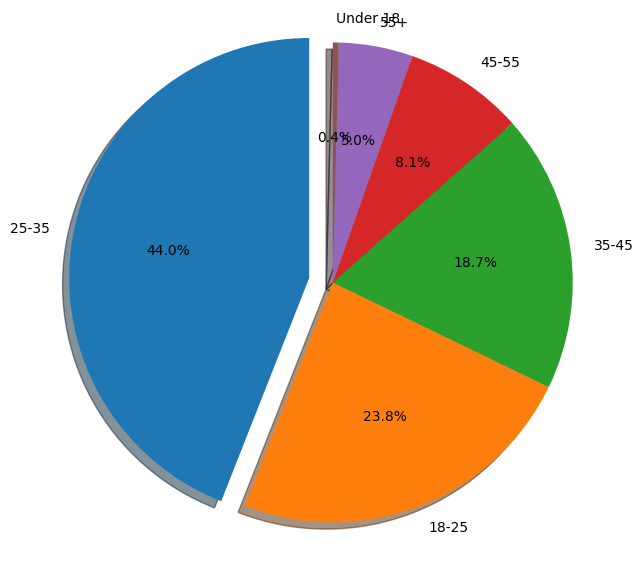

In [49]:
labels = dataset['What is your current age?'].value_counts().index.to_list()
sizes = dataset['What is your current age?'].value_counts().values.tolist()

explode = (0.1, 0, 0, 0,0,0) 

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

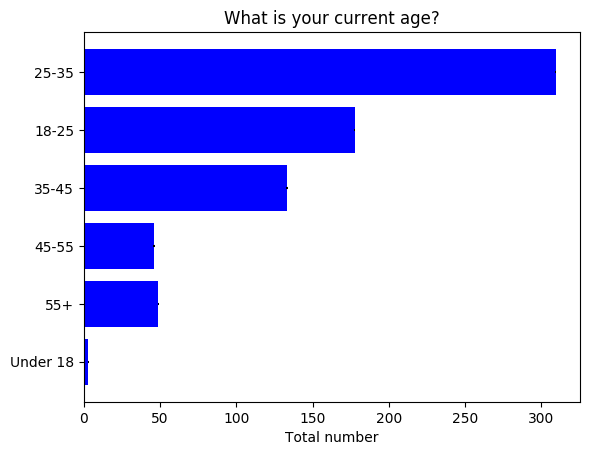

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
labels = dataset['What is your current age?'].value_counts().index.to_list()
y_pos = np.arange(len(labels))
performance = sizes * np.random.rand(len(labels))
error = np.random.rand(len(labels))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total number')
ax.set_title('What is your current age?')

plt.show()

In [50]:
dataset['Have you ever witnessed assault or rape?'].value_counts()

No     830
Yes    173
Name: Have you ever witnessed assault or rape?, dtype: int64

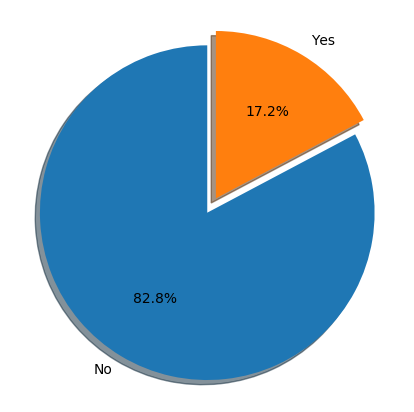

In [60]:
labels1 = dataset['Have you ever witnessed assault or rape?'].value_counts().index.to_list()
sizes1 = dataset['Have you ever witnessed assault or rape?'].value_counts().values.tolist()

explode = (0.1,0) 

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes1, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [75]:
dataset.groupby(['What is your current age?', 'Have you ever witnessed assault or rape?'])['Timestamp'].count()

What is your current age?  Have you ever witnessed assault or rape?
18-25                      No                                          185
                           Yes                                          54
25-35                      No                                          354
                           Yes                                          88
35-45                      No                                          166
                           Yes                                          21
45-55                      No                                           74
                           Yes                                           7
55+                        No                                           47
                           Yes                                           3
Under 18                   No                                            4
Name: Timestamp, dtype: int64

In [0]:
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

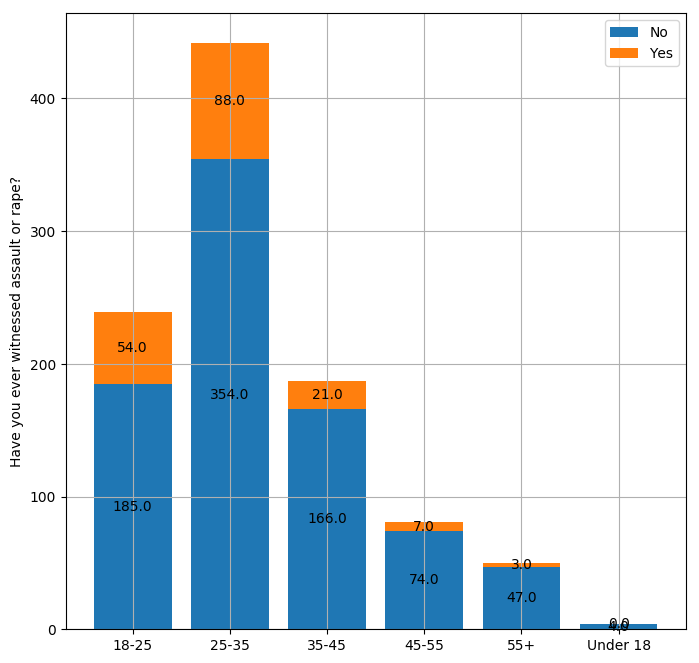

In [80]:
plt.figure(figsize=(8, 8))

series_labels = ['No', 'Yes']

data = [
    [185, 354, 166, 74, 47, 4],
    [54, 88, 21, 7, 3, 0]
]

category_labels = ['18-25', '25-35', '35-45', '45-55', '55+', 'Under 18']

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    y_label="Have you ever witnessed assault or rape?"
)

plt.savefig('bar.png')
plt.show()